In [1]:
import numpy as np # linear algebra
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras import backend

Using TensorFlow backend.


In [2]:
df =  pd.read_csv('Downloads/nyse/prices.csv', header=0)
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
df.symbol.unique()[0:20]

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN'], dtype=object)

In [4]:
df.shape

(851264, 7)

In [5]:
print(len(df.symbol.values))

851264


In [6]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [7]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [8]:
df.date.unique()

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', ..., '2016-12-28', '2016-12-29',
       '2016-12-30'], dtype=object)

In [9]:
comp_info = pd.read_csv('Downloads/nyse/securities.csv')
comp_info.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [10]:
comp_info["Ticker symbol"].nunique()

505

In [11]:
comp_info.loc[comp_info.Security.str.startswith('Face') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",2013-12-23,1326801


In [12]:
comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') | (comp_info["Security"] == 'Xerox Corp.') 
                          | (comp_info["Security"] == 'Adobe Systems Inc')
              | (comp_info["Security"] == 'Microsoft Corp.') | (comp_info["Security"] == 'Adobe Systems Inc') 
              | (comp_info["Security"] == 'Facebook') | (comp_info["Security"] == 'Goldman Sachs Group') ,
                          ["Ticker symbol"] ]["Ticker symbol"] 
comp_plot = comp_plot[4:5]

In [13]:
comp_plot

496    XRX
Name: Ticker symbol, dtype: object

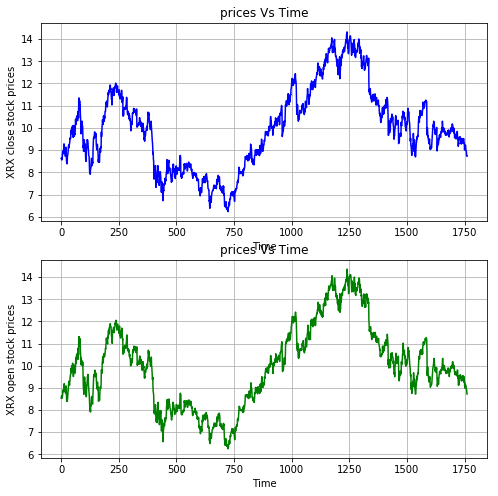

In [14]:
def plotter(code):
    global closing_stock
    global opening_stock
    f, axs = plt.subplots(2,2,figsize=(8,8))
    plt.subplot(212)
    company = df[df['symbol']==code]
    company = company.open.values.astype('float32')
    company = company.reshape(-1, 1)
    opening_stock = company
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel(code + " open stock prices")
    plt.title('prices Vs Time')
    plt.plot(company , 'g')
    
    plt.subplot(211)
    company_close = df[df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()
for i in comp_plot:
    plotter(i)


In [15]:
stocks = closing_stock[: , 0]
print(stocks)
stocks = stocks.reshape(len(stocks) , 1)

[8.63 8.64 8.56 ... 8.76 8.72 8.73]


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
stocks = scaler.fit_transform(stocks)

In [17]:
train = int(len(stocks) * 0.80)
test = len(stocks) - train

In [18]:
train = stocks[0:train]
print(train)

[[0.29666257]
 [0.29789865]
 [0.28800988]
 ...
 [0.5883807 ]
 [0.58590853]
 [0.5747837 ]]


In [19]:
test = stocks[len(train) : ]


In [20]:
train = train.reshape(len(train) , 1)
test = test.reshape(len(test) , 1)

In [21]:
print(train.shape , test.shape)

(1409, 1) (353, 1)


In [22]:
def process_data(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [23]:
n_features = 2

trainX, trainY = process_data(train, n_features)
testX, testY = process_data(test, n_features)

In [24]:
print(trainX.shape , trainY.shape , testX.shape , testY.shape)


(1406, 2) (1406,) (350, 2) (350,)


In [25]:
fftrainX = trainX.copy()
fftestX = testX.copy()

In [26]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [27]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense , BatchNormalization , Dropout , Activation
from keras.layers import LSTM , GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam , SGD , RMSprop

In [33]:
model = Sequential()
model.add(LSTM(5 , input_shape = (1 , n_features), activation="relu"))
model.add(Dense(1))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5)                 160       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 166
Trainable params: 166
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

In [35]:
# history = model.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
#           callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))

history = model.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
           validation_data = (testX,testY))

Train on 1406 samples, validate on 350 samples
Epoch 1/100
1406/1406 [==============================] - 1s 453us/step - loss: 0.2854 - mean_squared_error: 0.2854 - val_loss: 0.2094 - val_mean_squared_error: 0.2094
Epoch 2/100
1406/1406 [==============================] - 0s 17us/step - loss: 0.2779 - mean_squared_error: 0.2779 - val_loss: 0.2025 - val_mean_squared_error: 0.2025
Epoch 3/100
1406/1406 [==============================] - 0s 18us/step - loss: 0.2705 - mean_squared_error: 0.2705 - val_loss: 0.1958 - val_mean_squared_error: 0.1958
Epoch 4/100
1406/1406 [==============================] - 0s 18us/step - loss: 0.2634 - mean_squared_error: 0.2634 - val_loss: 0.1893 - val_mean_squared_error: 0.1893
Epoch 5/100
1406/1406 [==============================] - 0s 18us/step - loss: 0.2564 - mean_squared_error: 0.2564 - val_loss: 0.1833 - val_mean_squared_error: 0.1833
Epoch 6/100
1406/1406 [==============================] - 0s 16us/step - loss: 0.2498 - mean_squared_error: 0.2498 - val_lo

Epoch 50/100
1406/1406 [==============================] - 0s 17us/step - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 51/100
1406/1406 [==============================] - 0s 18us/step - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 52/100
1406/1406 [==============================] - 0s 16us/step - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 53/100
1406/1406 [==============================] - 0s 15us/step - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 54/100
1406/1406 [==============================] - 0s 17us/step - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 55/100
1406/1406 [==============================] - 0s 16us/step - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0043 - val_mean_squared_error: 0.004

1406/1406 [==============================] - 0s 16us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 100/100
1406/1406 [==============================] - 0s 16us/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


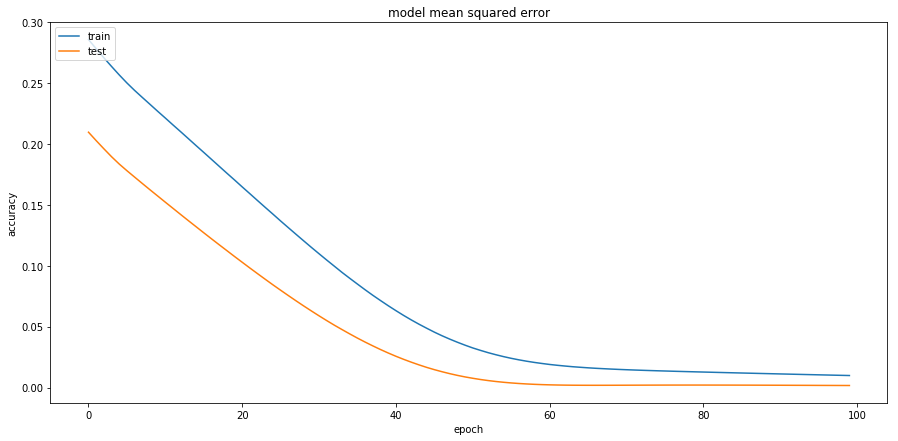

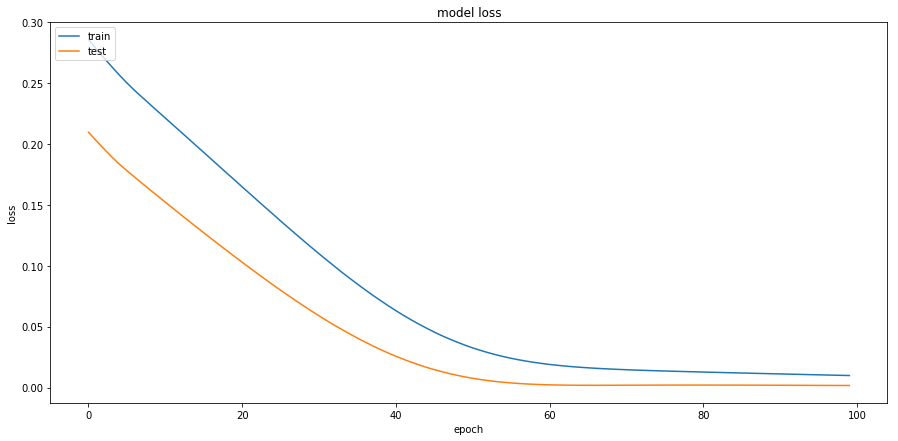

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean squared error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(model, trainX, trainY , testX, testY)

Train Score: 0.00976 MSE (0.10 RMSE)
Test Score: 0.00165 MSE (0.04 RMSE)


(0.009763111545592361, 0.0016494977367775782)

In [38]:
pred = model.predict(testX)
pred = scaler.inverse_transform(pred)
pred[:10]

array([[10.92908 ],
       [10.804073],
       [10.75466 ],
       [10.730352],
       [10.828788],
       [11.021551],
       [10.980099],
       [10.904375],
       [10.73598 ],
       [10.452383]], dtype=float32)

In [39]:
testY1 = testY.reshape(testY.shape[0] , 1)
testY1 = scaler.inverse_transform(testY1)
testY1[:10]

array([[11.01],
       [10.95],
       [11.05],
       [11.37],
       [11.32],
       [11.24],
       [11.03],
       [10.69],
       [ 9.93],
       [ 9.66]], dtype=float32)

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


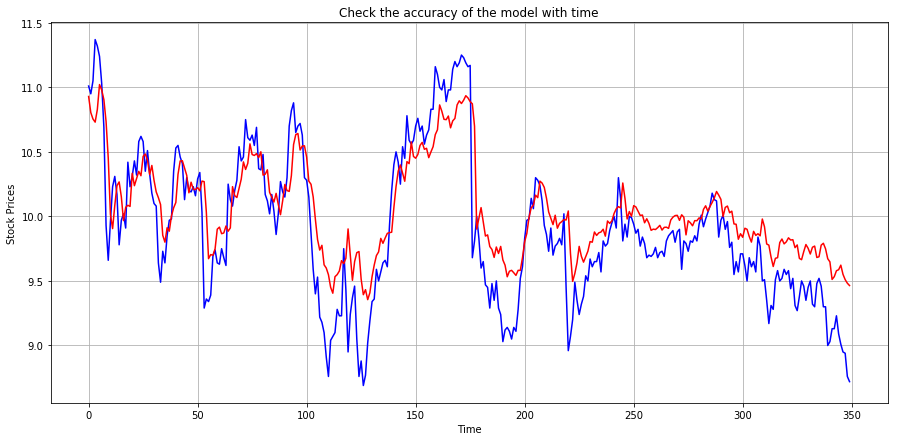

In [40]:
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(testY1 , 'b')
plt.plot(pred , 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [41]:
ffmodel = Sequential()
ffmodel.add(Dense(5, input_dim=2, 
	activation="relu"))
ffmodel.add(Dense(1))
print(ffmodel.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
None


Train on 1406 samples, validate on 350 samples
Epoch 1/100
1406/1406 [==============================] - 0s 194us/step - loss: 0.5501 - mean_squared_error: 0.5501 - val_loss: 0.3946 - val_mean_squared_error: 0.3946
Epoch 2/100
1406/1406 [==============================] - 0s 8us/step - loss: 0.5166 - mean_squared_error: 0.5166 - val_loss: 0.3665 - val_mean_squared_error: 0.3665
Epoch 3/100
1406/1406 [==============================] - 0s 8us/step - loss: 0.4845 - mean_squared_error: 0.4845 - val_loss: 0.3401 - val_mean_squared_error: 0.3401
Epoch 4/100
1406/1406 [==============================] - 0s 9us/step - loss: 0.4544 - mean_squared_error: 0.4544 - val_loss: 0.3153 - val_mean_squared_error: 0.3153
Epoch 5/100
1406/1406 [==============================] - 0s 9us/step - loss: 0.4263 - mean_squared_error: 0.4263 - val_loss: 0.2922 - val_mean_squared_error: 0.2922
Epoch 6/100
1406/1406 [==============================] - 0s 9us/step - loss: 0.3998 - mean_squared_error: 0.3998 - val_loss: 0

1406/1406 [==============================] - 0s 7us/step - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 51/100
1406/1406 [==============================] - 0s 8us/step - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 52/100
1406/1406 [==============================] - 0s 7us/step - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 53/100
1406/1406 [==============================] - 0s 7us/step - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 54/100
1406/1406 [==============================] - 0s 9us/step - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 55/100
1406/1406 [==============================] - 0s 8us/step - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 56/100
1406

1406/1406 [==============================] - 0s 7us/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 100/100
1406/1406 [==============================] - 0s 7us/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


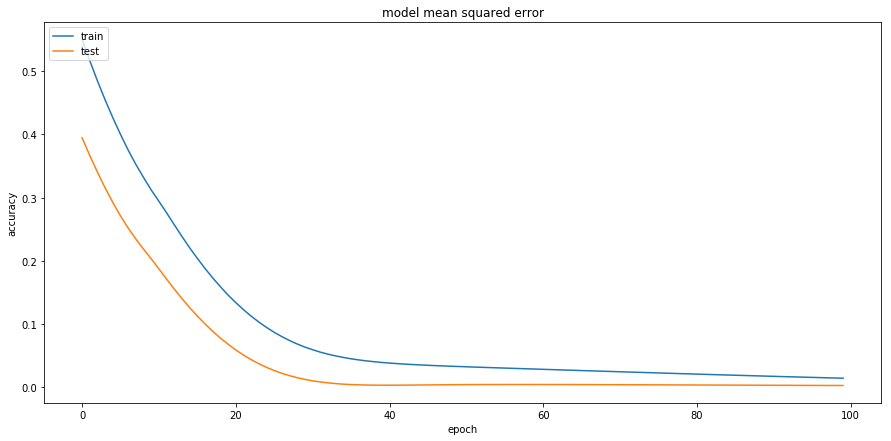

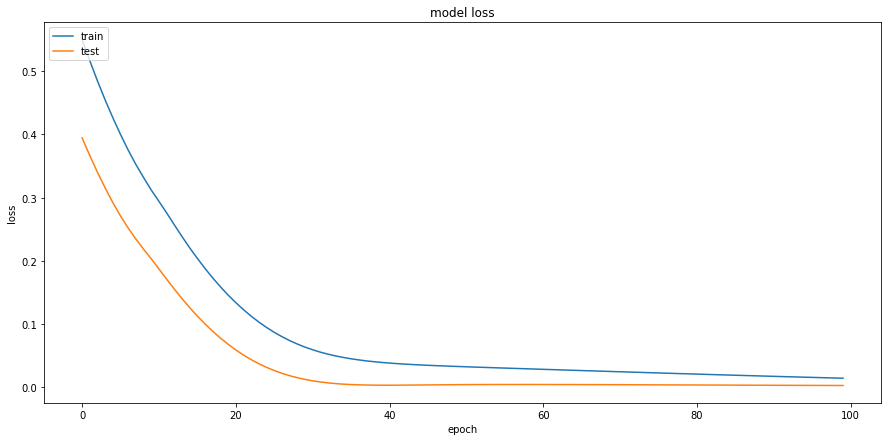

Train Score: 0.01415 MSE (0.12 RMSE)
Test Score: 0.00278 MSE (0.05 RMSE)
FF
Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


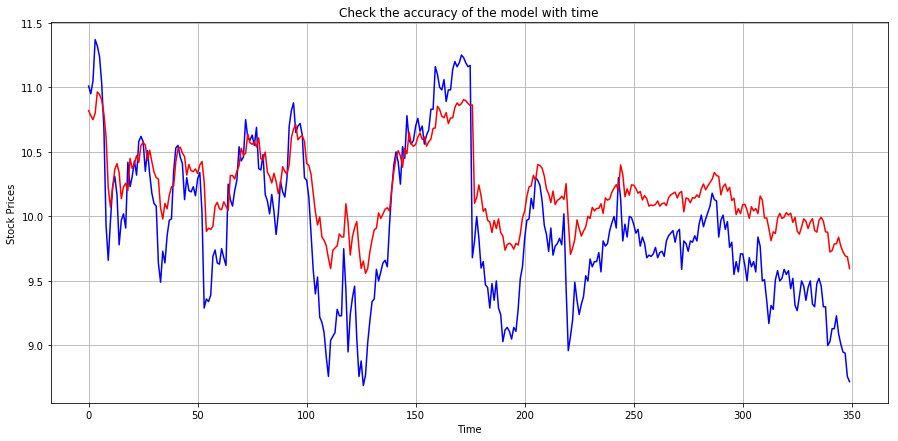

In [42]:
ffmodel.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

# history = model.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
#           callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))

ffhistory = ffmodel.fit(fftrainX, trainY, epochs=100 , batch_size = 128 , 
           validation_data = (fftestX,testY))

import matplotlib.pyplot as plt

plt.plot(ffhistory.history['mean_squared_error'])
plt.plot(ffhistory.history['val_mean_squared_error'])
plt.title('model mean squared error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(ffhistory.history['loss'])
plt.plot(ffhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(ffmodel, fftrainX, trainY , fftestX, testY)

ffpred = ffmodel.predict(fftestX)
ffpred = scaler.inverse_transform(ffpred)
ffpred[:10]

testY1 = testY.reshape(testY.shape[0] , 1)
testY1 = scaler.inverse_transform(testY1)
testY1[:10]

print("FF")
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(testY1 , 'b')
plt.plot(ffpred , 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

LSTM
Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


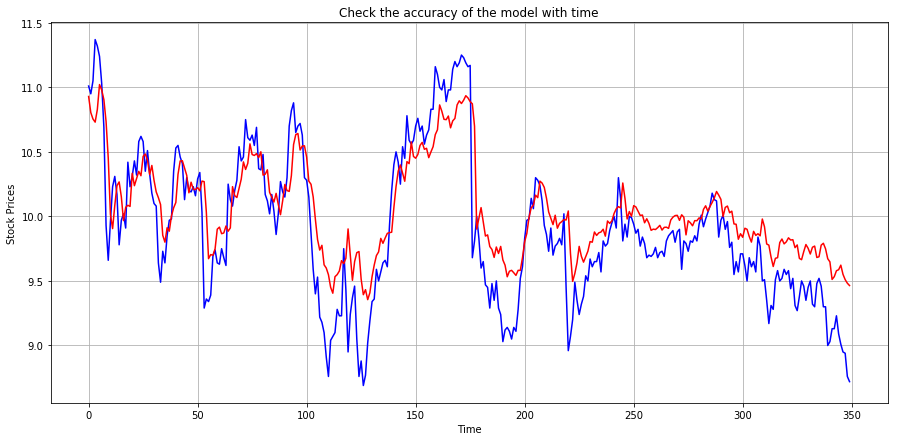

In [43]:
print("LSTM")
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(testY1 , 'b')
plt.plot(pred , 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [28]:
from keras.layers import SimpleRNN


In [29]:
rnnmodel = Sequential()
rnnmodel.add(SimpleRNN(5 , input_shape = (1 , n_features), activation="relu"))
rnnmodel.add(Dense(1))
print(rnnmodel.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 5)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
rnnmodel.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

rnnhistory = rnnmodel.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
           validation_data = (testX,testY))

Instructions for updating:
Use tf.cast instead.
Train on 1406 samples, validate on 350 samples
Epoch 1/100
1406/1406 [==============================] - 0s 177us/step - loss: 0.2666 - mean_squared_error: 0.2666 - val_loss: 0.1885 - val_mean_squared_error: 0.1885
Epoch 2/100
1406/1406 [==============================] - 0s 9us/step - loss: 0.2451 - mean_squared_error: 0.2451 - val_loss: 0.1703 - val_mean_squared_error: 0.1703
Epoch 3/100
1406/1406 [==============================] - 0s 8us/step - loss: 0.2243 - mean_squared_error: 0.2243 - val_loss: 0.1533 - val_mean_squared_error: 0.1533
Epoch 4/100
1406/1406 [==============================] - 0s 9us/step - loss: 0.2048 - mean_squared_error: 0.2048 - val_loss: 0.1374 - val_mean_squared_error: 0.1374
Epoch 5/100
1406/1406 [==============================] - 0s 10us/step - loss: 0.1866 - mean_squared_error: 0.1866 - val_loss: 0.1226 - val_mean_squared_error: 0.1226
Epoch 6/100
1406/1406 [==============================] - 0s 10us/step - loss:

1406/1406 [==============================] - 0s 11us/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 49/100
1406/1406 [==============================] - 0s 11us/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 50/100
1406/1406 [==============================] - 0s 10us/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 51/100
1406/1406 [==============================] - 0s 9us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 52/100
1406/1406 [==============================] - 0s 10us/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 53/100
1406/1406 [==============================] - 0s 10us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 54/100

1406/1406 [==============================] - 0s 10us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 9.5974e-04 - val_mean_squared_error: 9.5974e-04
Epoch 98/100
1406/1406 [==============================] - 0s 9us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 9.5022e-04 - val_mean_squared_error: 9.5022e-04
Epoch 99/100
1406/1406 [==============================] - 0s 9us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 9.3879e-04 - val_mean_squared_error: 9.3879e-04
Epoch 100/100
1406/1406 [==============================] - 0s 9us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 9.2795e-04 - val_mean_squared_error: 9.2795e-04


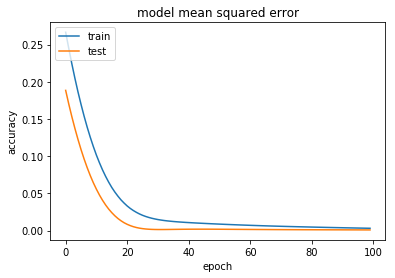

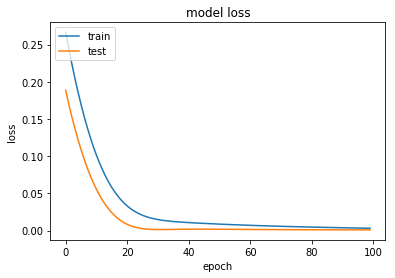

In [31]:
import matplotlib.pyplot as plt

plt.plot(rnnhistory.history['mean_squared_error'])
plt.plot(rnnhistory.history['val_mean_squared_error'])
plt.title('model mean squared error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(rnnhistory.history['loss'])
plt.plot(rnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


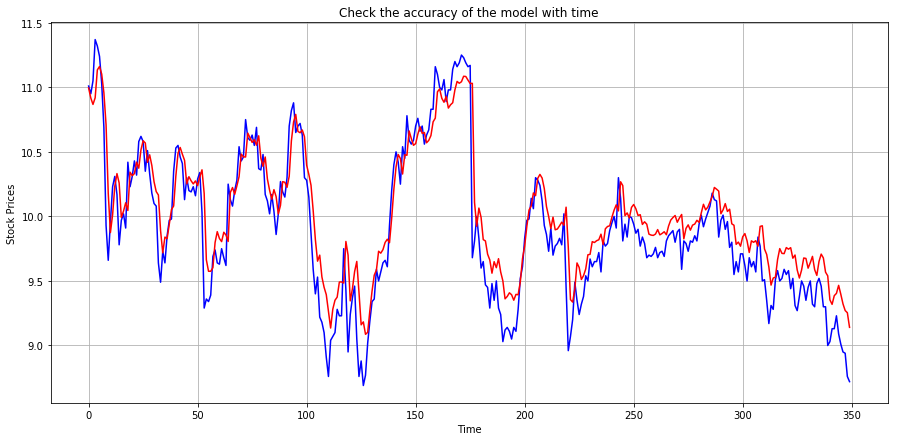

In [32]:
rnnpred = rnnmodel.predict(testX)
rnnpred = scaler.inverse_transform(rnnpred)
rnnpred[:10]

testY1 = testY.reshape(testY.shape[0] , 1)
testY1 = scaler.inverse_transform(testY1)
testY1[:10]

print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(testY1 , 'b')
plt.plot(rnnpred , 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

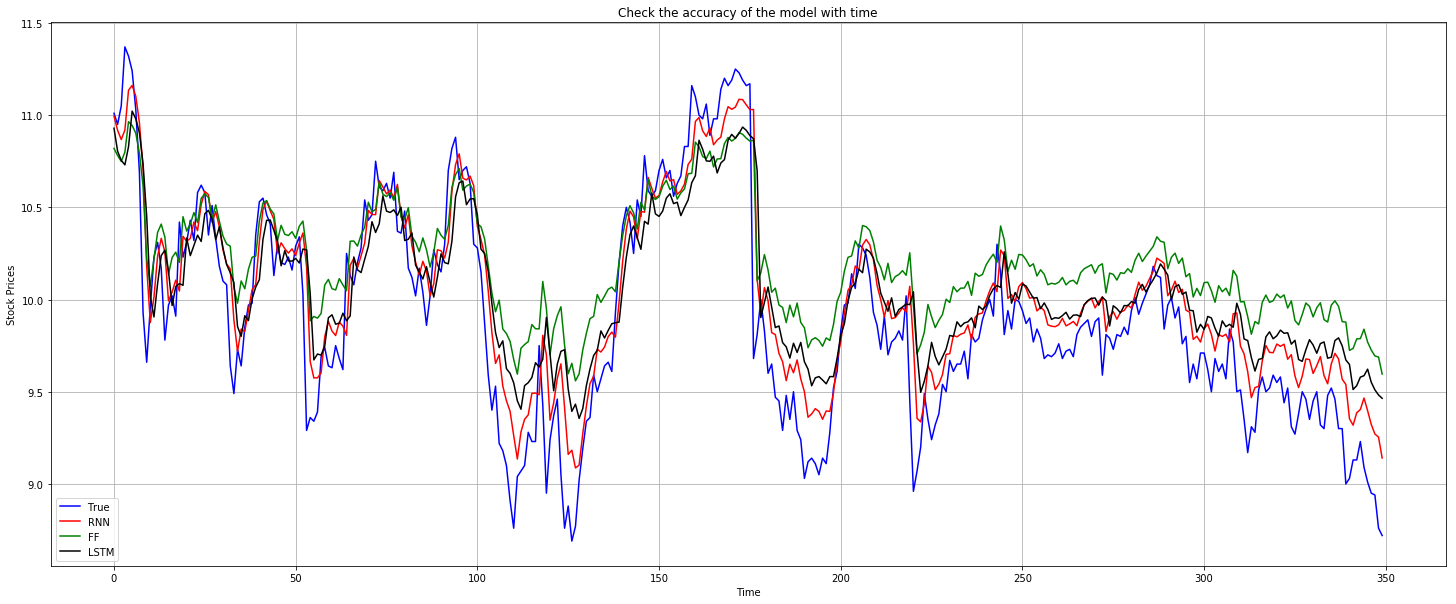

In [55]:
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(testY1 , 'b',label='True')
plt.plot(rnnpred , 'r',label='RNN')
plt.plot(ffpred , 'g',label='FF')
plt.plot(pred , '#000000',label='LSTM')
plt.legend(loc="lower left")
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()